In [1]:
import pandas as pd
import pandas as pd
import sys
sys.path.append('/home/suraj/Repositories/FM-extractors-radiomics')
from models.ct_fm_extractor import CTFMExtractor
from models.fmcib_extractor import FMCIBExtractor
from models.vista3d_extractor import VISTA3DExtractor
from models.voco_extractor import VocoExtractor
from models.suprem_extractor import SUPREMExtractor
from models.merlin_extractor import MerlinExtractor
from models.medimageinsight_extractor import MedImageInsightExtractor
import torch
from tqdm import tqdm
import pickle
from models import plot_3d_image



In [2]:
df = pd.read_csv("/mnt/data1/datasets/DukeLungNoduleDataset/DLCSD24_Annotations.csv")

df

,patient-id,nodule_id,ct_nifti_file,coordX,coordY,coordZ,w,h,d,Malignant_lbl,benchmark_split
0,DLCS_0001,DLCS_0001_01,DLCS_0001.nii.gz,-106.552734,-63.837891,-211.677185,4.394531,4.394531,4.296875,0,train
1,DLCS_0001,DLCS_0001_02,DLCS_0001.nii.gz,88.696289,39.477539,-126.091248,6.240234,6.240234,6.250000,0,train
2,DLCS_0002,DLCS_0002_01,DLCS_0002.nii.gz,-29.039062,-129.443359,-159.284363,4.746094,4.921875,4.843750,0,train
3,DLCS_0003,DLCS_0003_01,DLCS_0003.nii.gz,119.066605,82.543945,-210.403748,3.603516,3.603516,3.437500,0,train
4,DLCS_0004,DLCS_0004_01,DLCS_0004.nii.gz,67.520996,-216.194336,-139.278137,6.723633,6.679688,6.718750,0,train
...,...,...,...,...,...,...,...,...,...,...,...
2482,DLCS_1609,DLCS_1609_01,DLCS_1609.nii.gz,107.915039,-26.777344,-175.388123,6.767578,6.679688,6.718750,0,test
2483,DLCS_1610,DLCS_1610_01,DLCS_1610.nii.gz,70.315000,-212.525000,-136.620000,22.790000,16.310000,16.080000,0,test
2484,DLCS_1611,DLCS_1611_01,DLCS_1611.nii.gz,82.526169,4.716400,-113.934998,6.152344,5.976562,6.250000,0,test
2485,DLCS_1612,DLCS_1612_01,DLCS_1612.nii.gz,68.800000,-176.305000,-229.445000,5.500000,4.850000,2.970000,0,test


In [3]:
train_df = df[df["benchmark_split"] == "train"]

In [4]:
train_df

,patient-id,nodule_id,ct_nifti_file,coordX,coordY,coordZ,w,h,d,Malignant_lbl,benchmark_split
0,DLCS_0001,DLCS_0001_01,DLCS_0001.nii.gz,-106.552734,-63.837891,-211.677185,4.394531,4.394531,4.296875,0,train
1,DLCS_0001,DLCS_0001_02,DLCS_0001.nii.gz,88.696289,39.477539,-126.091248,6.240234,6.240234,6.250000,0,train
2,DLCS_0002,DLCS_0002_01,DLCS_0002.nii.gz,-29.039062,-129.443359,-159.284363,4.746094,4.921875,4.843750,0,train
3,DLCS_0003,DLCS_0003_01,DLCS_0003.nii.gz,119.066605,82.543945,-210.403748,3.603516,3.603516,3.437500,0,train
4,DLCS_0004,DLCS_0004_01,DLCS_0004.nii.gz,67.520996,-216.194336,-139.278137,6.723633,6.679688,6.718750,0,train
...,...,...,...,...,...,...,...,...,...,...,...
1613,DLCS_1055,DLCS_1055_01,DLCS_1055.nii.gz,-46.505000,54.435000,-25.590000,22.510000,11.610000,13.600000,0,train
1614,DLCS_1056,DLCS_1056_01,DLCS_1056.nii.gz,-63.100000,48.325000,-181.885000,37.900000,29.870000,28.790000,0,train
1615,DLCS_1057,DLCS_1057_01,DLCS_1057.nii.gz,-88.160000,36.285000,-181.490000,4.320000,4.210000,3.680000,0,train
1616,DLCS_1057,DLCS_1057_02,DLCS_1057.nii.gz,-59.430000,44.110000,-182.540000,12.220000,7.960000,4.040000,0,train


In [15]:
model = CTFMExtractor()


In [16]:
row = df.iloc[2]

row["image_path"] = f'/mnt/data1/datasets/DukeLungNoduleDataset/{row["ct_nifti_file"]}'
print(row)
image = model.preprocess(row)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


patient-id                                                 DLCS_0002
nodule_id                                               DLCS_0002_01
ct_nifti_file                                       DLCS_0002.nii.gz
coordX                                                    -29.039062
coordY                                                   -129.443359
coordZ                                                   -159.284363
w                                                           4.746094
h                                                           4.921875
d                                                            4.84375
Malignant_lbl                                                      0
benchmark_split                                                train
image_path         /mnt/data1/datasets/DukeLungNoduleDataset/DLCS...
Name: 2, dtype: object


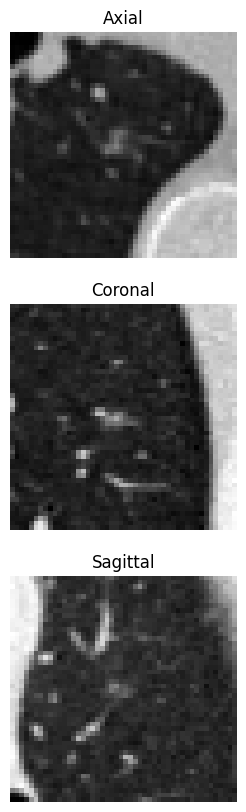

In [17]:

plot_3d_image(image)